In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
X,y = load_breast_cancer(return_X_y=True)

X.shape,y.shape

((569, 30), (569,))

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True,random_state=42)


In [13]:
model_lg1 = LogisticRegression(penalty="l2",random_state=42)
model_lg1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
train_score = metrics.accuracy_score(y_train, model_lg1.predict(X_train))
print("Train accuracy:   %0.5f" % train_score)

pred = model_lg1.predict(X_test)
    
score = metrics.accuracy_score(y_test, pred)
print("Test accuracy:   %0.5f" % score)

print("classification report:")
print(metrics.classification_report(y_test, pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, pred))

Train accuracy:   0.95538
Test accuracy:   0.96277
classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

confusion matrix:
[[ 63   4]
 [  3 118]]


In [15]:
model_nb = MultinomialNB(alpha=1.5)
model_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.5, class_prior=None, fit_prior=True)

In [16]:
train_score2 = metrics.accuracy_score(y_train, model_nb.predict(X_train))
print("Train accuracy:   %0.5f" % train_score2)

pred2 = model_lg1.predict(X_test)
    
score2 = metrics.accuracy_score(y_test, pred2)
print("Test accuracy:   %0.5f" % score2)

print("classification report:")
print(metrics.classification_report(y_test, pred2))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, pred2))

Train accuracy:   0.88451
Test accuracy:   0.96277
classification report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

confusion matrix:
[[ 63   4]
 [  3 118]]


### Task A --- > Report the hyperparameters done in the above cells .. check and report them accordingly. 

### Task B---> Learning curves

In [17]:
from sklearn.model_selection import learning_curve


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, stratify= y,random_state=42)


In [19]:
## Frequency check for unique values

(unique, counts) = np.unique(y_train, return_counts=True)

frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[  0 142]
 [  1 239]]


In [20]:
train_size_pass = [0.2,0.4,0.6,0.8,1.0]

### Logistic regression LC

In [21]:
train_sizes_lg, train_scores_lg, validation_scores_lg = learning_curve(estimator = model_lg1,
                                                              X = X_train,y = y_train, train_sizes = train_size_pass, 
                                                              cv = 5,n_jobs=-1,scoring = 'neg_mean_squared_error')

### NB Learning curve

In [22]:
train_sizes_nb, train_scores_nb, validation_scores_nb = learning_curve(estimator = model_nb,
                                                              X = X_train,y = y_train, train_sizes = train_size_pass, 
                                                              cv = 5,n_jobs=-1,scoring = 'neg_mean_squared_error')

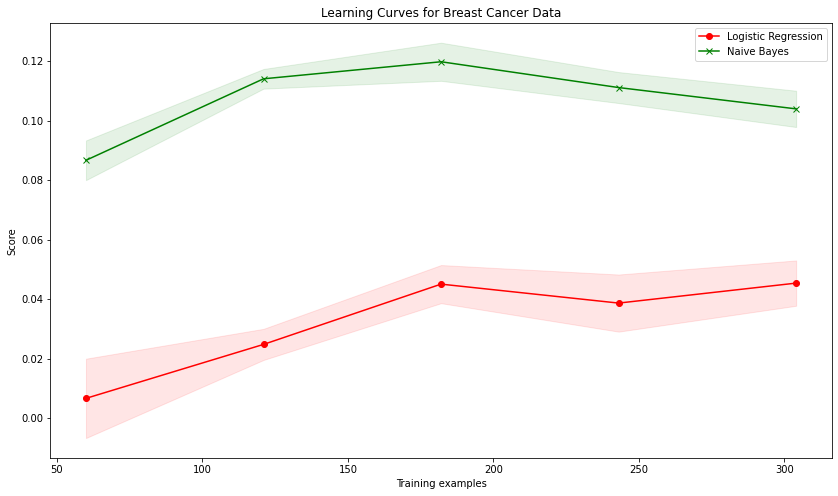

In [23]:
#if axes is None:
_, axes = plt.subplots(1, 1, figsize=(14, 8))

axes.set_title("Learning Curves for Breast Cancer Data")
#if ylim is not None:
#    axes[0].set_ylim(*ylim)
axes.set_xlabel("Training examples")
axes.set_ylabel("Score")

train_scores_mean_lg = -train_scores_lg.mean(axis = 1)
train_scores_mean_nb = -train_scores_nb.mean(axis = 1)


#train_scores_mean_lg = np.mean(train_scores_lg, axis=1)
train_scores_std_lg = np.std(-train_scores_lg, axis=1)
#train_scores_mean_nb = np.mean(train_scores_nb, axis=1)
train_scores_std_nb = np.std(-train_scores_nb, axis=1)
#test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)



# Plot learning curve
#axes[0].grid()
axes.fill_between(train_sizes_lg, train_scores_mean_lg - train_scores_std_lg,
                     train_scores_mean_lg + train_scores_std_lg, alpha=0.1,
                     color="r")
axes.fill_between(train_sizes_nb, train_scores_mean_nb - train_scores_std_nb,
                     train_scores_mean_nb + train_scores_std_nb, alpha=0.1,
                     color="g")
axes.plot(train_sizes_lg, train_scores_mean_lg, 'o-', color="r",
             label="Logistic Regression")
axes.plot(train_sizes_nb, train_scores_mean_nb, 'x-', color="g",
             label="Naive Bayes")
axes.legend(loc="best")

In [17]:
X_train.shape

(381, 30)

In [18]:
train_sizes_lg

array([ 60, 121, 182, 243, 304])

# Assignment 4.4

In [19]:
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
# Categories to select while selecting data

categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware']


In [21]:
newsgroup_data = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42,remove=('headers', 'footers', 'quotes'))

type(newsgroup_data)

sklearn.utils.Bunch

In [22]:
X = newsgroup_data.data
y = newsgroup_data.target

In [23]:
y.shape

(4702,)

In [24]:
vectorizer = CountVectorizer(max_df=1.0,stop_words='english')
X = vectorizer.fit_transform(X)
#X_test = vectorizer.transform(X_test)

feature_names = vectorizer.get_feature_names()

print(X.shape)
#print(X_test.shape)
print(len(feature_names))


(4702, 70469)
70469


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, stratify= y,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3150, 70469)
(1552, 70469)
(3150,)
(1552,)


In [26]:
model_lg2 = LogisticRegression(penalty="l2",random_state=42)
model_lg2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
train_score = metrics.accuracy_score(y_train, model_lg2.predict(X_train))
print("Train accuracy:   %0.5f" % train_score)

pred = model_lg2.predict(X_test)
    
score = metrics.accuracy_score(y_test, pred)
print("Test accuracy:   %0.5f" % score)

print("classification report:")
print(metrics.classification_report(y_test, pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, pred))

Train accuracy:   0.97619
Test accuracy:   0.77191
classification report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       264
           1       0.79      0.73      0.76       321
           2       0.75      0.78      0.76       325
           3       0.74      0.69      0.71       324
           4       0.70      0.80      0.74       318

    accuracy                           0.77      1552
   macro avg       0.78      0.78      0.78      1552
weighted avg       0.77      0.77      0.77      1552

confusion matrix:
[[236   5   8   1  14]
 [ 10 235  28  20  28]
 [  2  25 252  24  22]
 [  4  21  32 222  45]
 [  5  11  17  32 253]]


In [28]:
model_nb1 = MultinomialNB(alpha=0.2)
model_nb1.fit(X_train, y_train)

MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

In [29]:
train_score2 = metrics.accuracy_score(y_train, model_nb1.predict(X_train))
print("Train accuracy:   %0.5f" % train_score2)

pred2 = model_nb1.predict(X_test)
    
score2 = metrics.accuracy_score(y_test, pred2)
print("Test accuracy:   %0.5f" % score2)

print("classification report:")
print(metrics.classification_report(y_test, pred2))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, pred2))

Train accuracy:   0.77651
Test accuracy:   0.67397
classification report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       264
           1       0.66      0.79      0.72       321
           2       0.37      0.07      0.11       325
           3       0.59      0.80      0.68       324
           4       0.67      0.83      0.74       318

    accuracy                           0.67      1552
   macro avg       0.64      0.68      0.63      1552
weighted avg       0.63      0.67      0.62      1552

confusion matrix:
[[247   2   6   4   5]
 [ 13 254  11  25  18]
 [  7 108  22 122  66]
 [  1  12   8 260  43]
 [  4  10  12  29 263]]


### Task C

In [30]:
from mlxtend.evaluate import paired_ttest_5x2cv

In [31]:
t, p = paired_ttest_5x2cv(estimator1=model_lg2,
                          estimator2=model_nb1,
                          X=X, y=y,
                          random_seed=42)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

t statistic: 6.104
p value: 0.002
